# Euler Foward Time Backward Space (Upwind)

## Taylor Series

$$ f(x + a) = f(x) + a f^{'}(x) + \frac{a^{2}}{2} f^{''}(x) + \frac{a^3}{6} f^{'''}(x) + \Theta(a^4) $$

### Hiperbolic partial differential equation:

$$ \frac{\partial{f(x)}}{\partial{t}} + c\frac{\partial{f(x)}}{\partial{x}} = 0 $$

where c is the velocity of the wave.

### Euler aproximation

#### Foward time:

$$ f(x, t + \Delta t) = f(x, t) + \Delta t \frac{\partial{f(x, t)}}{\partial{t}} + \Theta({\Delta t}^2) $$

and

$$ \frac{\partial{f(x, t)}}{\partial{t}} = \frac{f(x, t + \Delta t) - f(x, t)}{\Delta t}  $$

with error $\Theta(\Delta t^2)$.

#### Backward Space:

$$ f(x - \Delta x, t) = f(x,t) - \Delta x \frac{\partial{f(x,t)}}{\partial{x}} + \Theta({\Delta x}^2) $$

and

$$ \frac{\partial{f(x, t)}}{\partial{x}} = \frac{f(x,t) - f(x-\Delta x, t)}{\Delta x}  $$

with error $\Theta(\Delta x^2)$.

### Discretization of Hiperbolic Equation


$$ \frac{f(x, t + \Delta t) - f(x, t)}{\Delta t} + c \left( \frac{f(x,t) - f(x-\Delta x, t)}{\Delta x} \right) = 0 $$

#### The same using index

$$ \frac{f^{n+1}_{i} - f^{n}_{i}}{\Delta t} + c \left( \frac{f^{n}_{i} - f^{n}_{i-1}}{\Delta x} \right) = 0 $$

so we have:


$$ f^{n+1}_{i} =  f^{n}_{i} - c \frac{\Delta t}{\Delta x} ( f^{n}_{i} - f^{n}_{i-1} ) $$

where $ c \frac{\Delta t}{\Delta x} $ is the Courant Friedrichs Lewy number, CFL number.

## Required Libs

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Field Values

In [10]:
# Spatial discretization
L = 10.0                                      # Domain length
n = 101                                       # Number of points
dx = L/(n-1)                                  # Length of spacing
x = np.linspace(0,L,n)                        # Node Positions

# Time discretization
nt = 10                                       # Number of time steps
dt = 0.1                                      # Time step

# Wave equation parameters
a = 0.5                                       # Velocity coefficient

# Initial conditions
f = np.zeros((n,1))                           # Wave function (Initialization)
f[40:60] = 1.0                                # Wave square pulse
fi = np.copy(f)                               # Initial f

## Initial condition

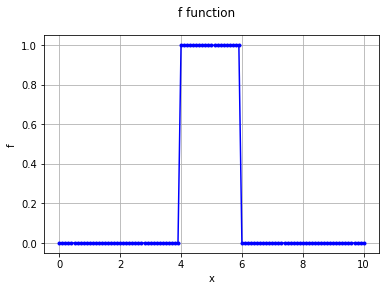

In [11]:
plt.plot(x,f,'.-b')
plt.suptitle('f function')
plt.xlabel('x')
plt.ylabel('f')
plt.grid()
plt.show()

## Upwind Solution

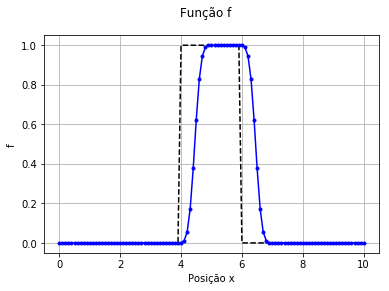

In [12]:
# Time loop
for k in range(0,nt):
    fo = np.copy(f)
    for i in range(1,n-1):
        f[i] = fo[i] - (a*dt/dx)*(fo[i]-fo[i-1])
    f[0] = fo[n-1]
    
plt.plot(x,fi,'--k',x,f,'.-b')
plt.suptitle('Função f')
plt.xlabel('Posição x')
plt.ylabel('f')
plt.grid()
plt.show()